## Example SphericallySymmetricVolCondMEG vs. InfiniteHomogeneousVolCondMEG

This example notebook compares two alternative methods for computing magnetic fields from a current dipole. 
Class `InfiniteHomogeneousVolCondMEG` assumes an infinite homogeneous conductive medium, while class `SphericallySymmetricVolCondMEG` assumes a spherically symmetric volume conductor model where the conductance varies as function of radius. The conductance is zero outside of the sphere.

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import lfpykit
import unittest

In [3]:
# current dipole moment
p = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])

# current dipole location in space
r_p = np.array([0, 0, 90000])

# points on sphere surface
u = np.linspace(0, 2*np.pi, 10)
v = np.linspace(0, np.pi/24, 10)
x = 92000 * np.outer(np.cos(u), np.sin(v))
y = 92000 * np.outer(np.sin(u), np.sin(v))
z = 92000 * np.outer(np.ones(np.size(u)), np.cos(v))

# sensor location(s) in space
r = np.c_[x.flatten(), y.flatten(), z.flatten()]

In [4]:
meg = lfpykit.eegmegcalc.SphericallySymmetricVolCondMEG(r=r)

In [5]:
M_radial = meg.get_transformation_matrix(r_p=r_p)

In [6]:
MEG = lfpykit.eegmegcalc.InfiniteHomogeneousVolCondMEG(sensor_locations=r)

In [7]:
M_infty = MEG.get_transformation_matrix(dipole_location=r_p)

In [8]:
# compute magnetic field
H_radial = M_radial @ p
H_infty = M_infty @ p

Text(0.5, 0, 'z (µm)')

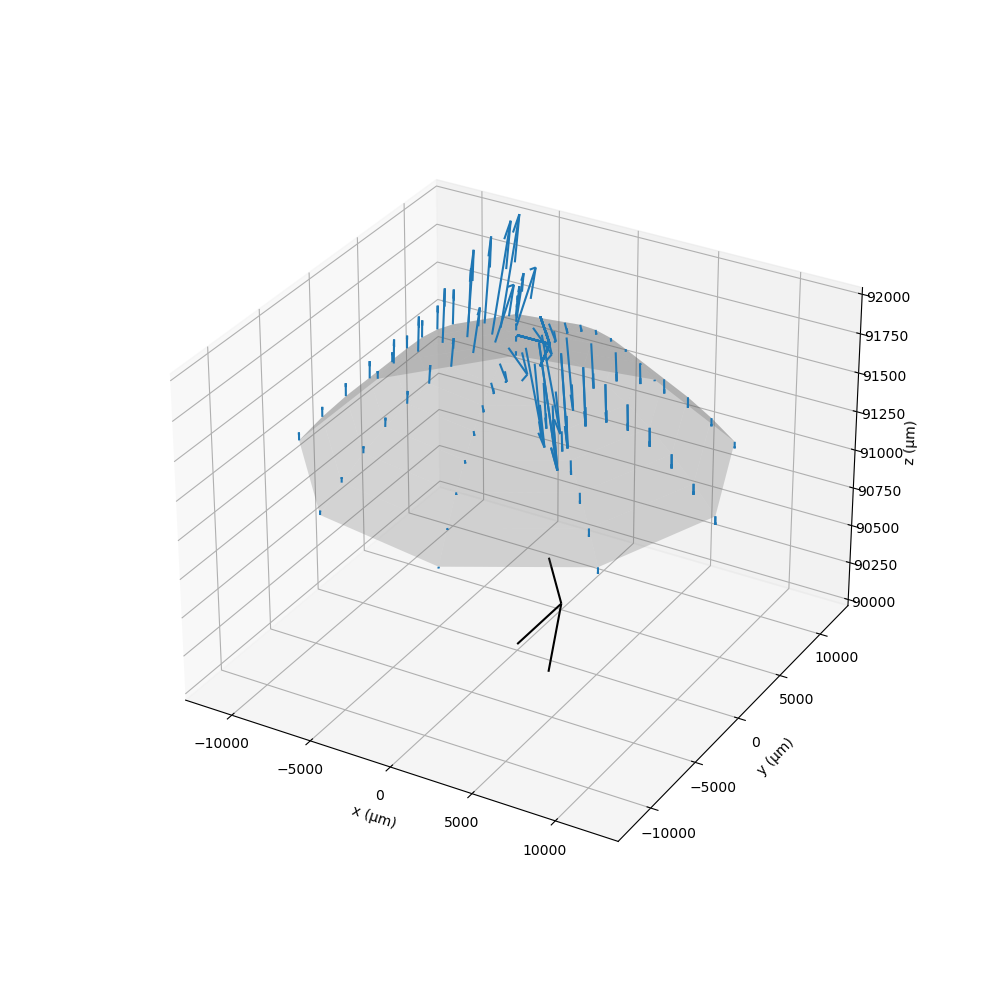

In [9]:
# quiver plots for radial dipole
scaling=1E11
index = 1
ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
ax.plot_surface(x, y, z, alpha=0.25, color='gray')

ax.quiver3D(r[:, 0], r[:, 1], r[:, 2], 
            H_infty[:, 0, index]*scaling, H_infty[:, 1, index]*scaling, H_infty[:, 2, index]*scaling, 
            length=1, normalize=False)
ax.quiver3D(r_p[0], r_p[1], r_p[2],
            p[0, index], p[1, index], p[2, index], color='k', length=5E3, normalize=False)
ax.set_xlabel('x (µm)')
ax.set_ylabel('y (µm)')
ax.set_zlabel('z (µm)')

Text(0.5, 0, 'z (µm)')

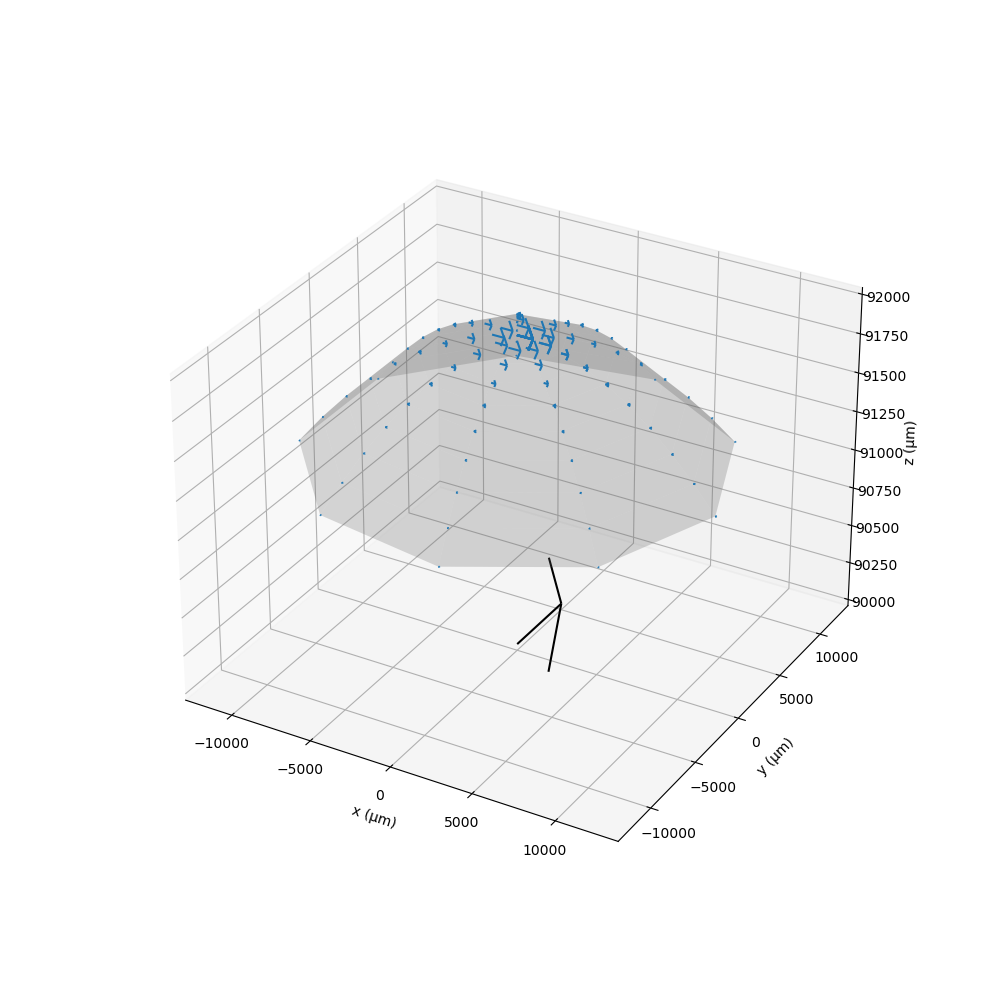

In [10]:
# quiver plots for radial dipole
scaling=1E11
index = 1
ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')

ax.plot_surface(x, y, z, alpha=0.25, color='gray')

ax.quiver3D(r[:, 0], r[:, 1], r[:, 2], 
            H_radial[:, 0, index]*scaling, H_radial[:, 1, index]*scaling, H_radial[:, 2, index]*scaling, 
            length=1, normalize=False)
ax.quiver3D(r_p[0], r_p[1], r_p[2],
            p[0, index], p[1, index], p[2, index], color='k', length=5E3, normalize=False)
ax.set_xlabel('x (µm)')
ax.set_ylabel('y (µm)')
ax.set_zlabel('z (µm)')